In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from pyspark.sql.functions import *
from pyspark.sql.types import DateType
from pyspark.sql import SparkSession, DataFrame

In [2]:
sp = (
    SparkSession.builder.appName("Model")
    .config("spark.sql.session.timeZone", "+11")
    #.config("spark.driver.memory", "10g")
    #.config("spark.executor.memory", "10g")
    #.config('spark.sql.parquet.cacheMetadata', 'True')
    .getOrCreate()
)
sp

22/10/08 17:54:31 WARN Utils: Your hostname, J-L resolves to a loopback address: 127.0.1.1; using 172.28.113.244 instead (on interface eth0)
22/10/08 17:54:31 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/10/08 17:54:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
dataset = sp.read.option("inferSchema", True).parquet("../models/random_forest_output_full/")
dataset.show(1)

+-------+------------+--------------+-----------+-----------------+--------+------------------+-----------------+--------------+--------------+-------------+--------------+----------------------+----------+
|user_id|merchant_abn|order_datetime|Natural_var|Potential_Outlier|postcode|dayofmonth_encoded|dayofweek_encoded| month_encoded|  tags_encoded|state_encoded|gender_encoded|Earnings_Class_encoded|prediction|
+-------+------------+--------------+-----------+-----------------+--------+------------------+-----------------+--------------+--------------+-------------+--------------+----------------------+----------+
|  15204| 87639550697|    2022-05-22|          0|                0|    6625|    (30,[6],[1.0])|    (6,[1],[1.0])|(11,[9],[1.0])|(24,[4],[1.0])|(7,[2],[1.0])| (2,[0],[1.0])|         (4,[1],[1.0])|       1.0|
+-------+------------+--------------+-----------+-----------------+--------+------------------+-----------------+--------------+--------------+-------------+--------------+

In [4]:
selected = dataset.select("merchant_abn", "order_datetime", "postcode", "prediction")
selected.show(2)

+------------+--------------+--------+----------+
|merchant_abn|order_datetime|postcode|prediction|
+------------+--------------+--------+----------+
| 87639550697|    2022-05-22|    6625|       1.0|
| 57900494384|    2022-05-22|    1597|       1.0|
+------------+--------------+--------+----------+
only showing top 2 rows



In [5]:
avg_merchant_pred = selected.groupBy("merchant_abn").avg("prediction").toPandas()
avg_merchant_pred.head()

,merchant_abn,avg(prediction)
0,83412691377,1.0
1,73256306726,1.0
2,38700038932,1.0
3,73841664453,1.0
4,35344855546,1.0


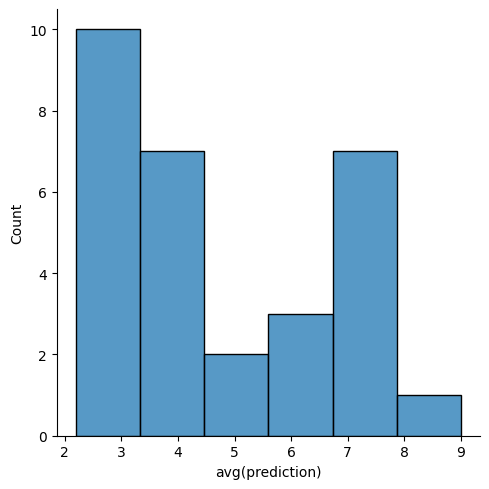

In [8]:
import seaborn as sns

sns.displot(avg_merchant_pred[avg_merchant_pred["avg(prediction)"] > 2]["avg(prediction)"])